 # Linear regression modelling for predicting stock prices and testing all assumptions

Step 1: Downloading the data

In [129]:
import yfinance as yf
import pandas as pd


In [130]:
# Define tickers
tickers = ['AAPL','AMZN','MSFT','QQQ','^GSPC']

# Download last 5 years of daily data
df = yf.download(tickers, start="2020-01-01", end="2024-12-31")['Close']
df

[*********************100%***********************]  5 of 5 completed


Ticker,AAPL,AMZN,MSFT,QQQ,^GSPC
Date,,,,,
2020-01-02,72.620842,94.900497,153.042297,209.325897,3257.850098
2020-01-03,71.914825,93.748497,151.136673,207.408478,3234.850098
2020-01-06,72.487839,95.143997,151.527344,208.744873,3246.280029
2020-01-07,72.146957,95.343002,150.145706,208.715790,3237.179932
2020-01-08,73.307487,94.598503,152.537308,210.284546,3253.050049
...,...,...,...,...,...
2024-12-23,254.655716,225.059998,433.583038,522.091431,5974.069824
2024-12-24,257.578674,229.050003,437.647369,529.170898,6040.040039
2024-12-26,258.396667,227.050003,436.432068,528.811401,6037.589844


In [131]:
 # Step 2: Perform Feature Engineering
 # Lesson: To predict AAPL Stock price, we have to consider yesterday's p
 # The market is not open yet so we don't know what's the price today
 # Considering Yesterday's Value
 df["AAPL(t-1)"] = df["AAPL"].shift(1)
 df["AMZN(t-1)"] = df["AMZN"].shift(1)
 df["MSFT(t-1)"] = df["MSFT"].shift(1)
 df["QQQ(t-1)"] = df["QQQ"].shift(1)
 df["^GSPC(t-1)"] = df['^GSPC'].shift(1)
 # Moving Avg (MA): Technical Indicator - It helps you understand the sho
 df['AAPL_MA_5'] = df['AAPL'].rolling(window=5).mean()
 df['AMZN_MA_5'] = df['AMZN'].rolling(window=5).mean()
 df['MSFT_MA_5'] = df['MSFT'].rolling(window=5).mean()
 df['QQQ_MA_5'] = df['QQQ'].rolling(window=5).mean()
 df['^GSPC_MA_5'] = df['^GSPC'].rolling(window=5).mean()
 # Set Y Variable - Next day
 df['Target'] = df['AAPL'].shift(-1)
 df = df.dropna()

In [132]:
df.columns 

Index(['AAPL', 'AMZN', 'MSFT', 'QQQ', '^GSPC', 'AAPL(t-1)', 'AMZN(t-1)',
       'MSFT(t-1)', 'QQQ(t-1)', '^GSPC(t-1)', 'AAPL_MA_5', 'AMZN_MA_5',
       'MSFT_MA_5', 'QQQ_MA_5', '^GSPC_MA_5', 'Target'],
      dtype='object', name='Ticker')

In [133]:
# Y = Intercept + B1*X1 + B2*X2 + B3*X3

In [134]:
# Step 3: Fit a Linear Regression Model
 # Set X and Y variable for Linear Regression Model - Ordinary Least Squa
import statsmodels.api as sm
X = df[['AAPL(t-1)', 'AMZN(t-1)',
'MSFT(t-1)', 'QQQ(t-1)', '^GSPC(t-1)', 'AAPL_MA_5', 'AMZN_MA_5',
'MSFT_MA_5', 'QQQ_MA_5', '^GSPC_MA_5']]
Y = df['Target']
X_const = sm.add_constant(X) # Intercept Term
# Train the Model
model = sm.OLS(Y, X_const).fit()
# Summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.644e+04
Date:                Tue, 03 Jun 2025   Prob (F-statistic):               0.00
Time:                        14:04:46   Log-Likelihood:                -3383.9
No. Observations:                1252   AIC:                             6790.
Df Residuals:                    1241   BIC:                             6846.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5109      1.146      0.446      0.656      -1.737       2.759
AAPL(t-1)      0.4682      0.081      5.764      0.000       0.309       0.628
AMZN(t-1)      0.0646      0.067      0.958      0.338      -0.068       0.197
MSFT(t-1)     -0.0165      0.052     -0.314      0.753      -0.119       0.086
QQQ(t-1)       0.0090      0.101      0.089      0.929      -0.190       0.208
^GSPC(t-1)     0.0053      0.007      0.734      0.463      -0.009       0.019
AAPL_MA_5      0.5158      0.082      6.279      0.000       0.355       0.677
AMZN_MA_5     -0.0594      0.069     -0.866      0.386      -0.194       0.075
MSFT_MA_5      0.0281      0.053      0.531      0.595      -0.076       0.132
QQQ_MA_5      -0.0099      0.104     -0.096      0.924      -0.213       0.193
^GSPC_MA_5    -0.0056      0.007     -0.776      0.438      -0.020       0.009
==============================================================================
Omnibus:                       26.037   Durbin-Watson:                   0.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.707
Skew:                          -0.085   Prob(JB):                     1.61e-11
Kurtosis:                       3.961   Cond. No.                     6.88e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [135]:
 # P value < 0.05 = Variable is significant => Keep that variable
 # P value > 0.05 = Variable is not significant => Drop that variable

In [136]:
# Set X and Y variable for Linear Regression Model - Ordinary Least Squa
import statsmodels.api as sm
X = df[['AAPL(t-1)', '^GSPC(t-1)']] # Dropping AAPL_MA_5
Y = df['Target']
X_const = sm.add_constant(X) # Intercept Term
# Train the Model
model = sm.OLS(Y, X_const).fit()
# Summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 7.762e+04
Date:                Tue, 03 Jun 2025   Prob (F-statistic):               0.00
Time:                        14:04:46   Log-Likelihood:                -3423.4
No. Observations:                1252   AIC:                             6853.
Df Residuals:                    1249   BIC:                             6868.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7187      0.750     -0.959      0.338      -2.189       0.752
AAPL(t-1)      0.9840      0.007    140.621      0.000       0.970       0.998
^GSPC(t-1)     0.0008      0.000      2.114      0.035    5.81e-05       0.002
==============================================================================
Omnibus:                       40.865   Durbin-Watson:                   1.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.864
Skew:                          -0.036   Prob(JB):                     2.79e-23
Kurtosis:                       4.409   Cond. No.                     3.08e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [137]:
import pandas as pd
df_train_predict = pd.DataFrame()
df_train_predict['Actual'] = df['Target']
df_train_predict['Predicted'] = model.predict(X_const)
df_train_predict

,Actual,Predicted
Date,,
2020-01-08,74.864616,72.887292
2020-01-09,75.033882,74.042072
2020-01-10,76.636917,75.591774
2020-01-13,75.602066,75.750786
2020-01-14,75.278091,77.346571
...,...,...
2024-12-20,254.655716,249.220624
2024-12-23,257.578674,253.885818
2024-12-24,258.396667,254.686380


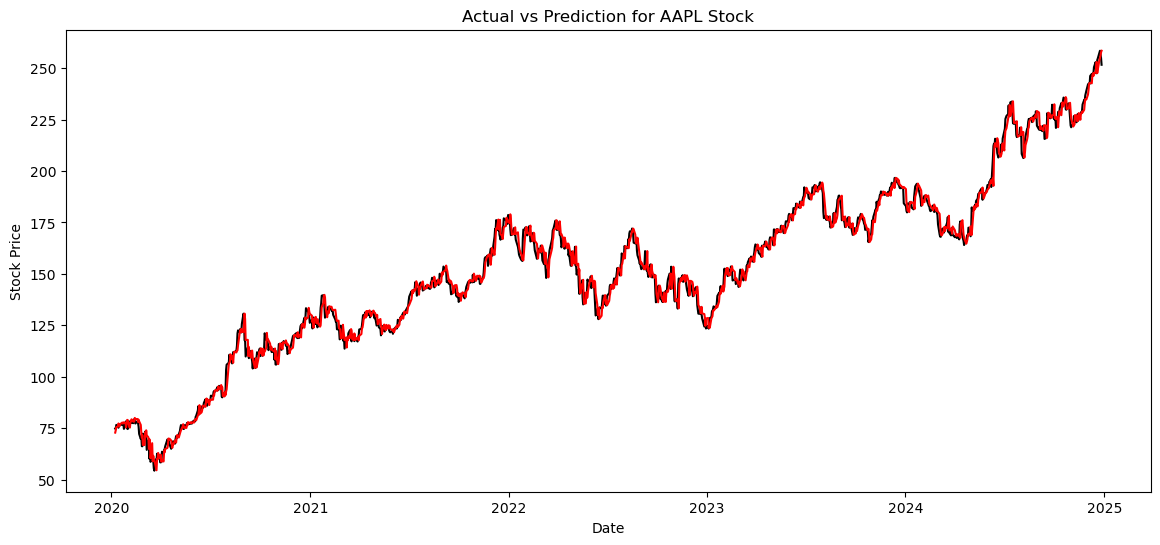

In [138]:
# Plot between Actual vs Predicted Value
import matplotlib.pyplot as plt
plt.figure(figsize = (14,6))
plt.plot(df_train_predict.index, df_train_predict['Actual'], label = 'Actual',color='black')
plt.plot(df_train_predict.index, df_train_predict['Predicted'], label ='Predicted',color='red')
plt.title("Actual vs Prediction for AAPL Stock")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.show()

In [139]:
 # We need to check how the model is performing on test data

In [140]:
# Linear Regression:  (Given the dataset here)
# Step 1: Train the Model 
# Step 2: Test the Model
# 2 + 2 = 4 - Trained
# 2 + 2 = 4 - Testing
# 2 + 9 = 11 => Good Model

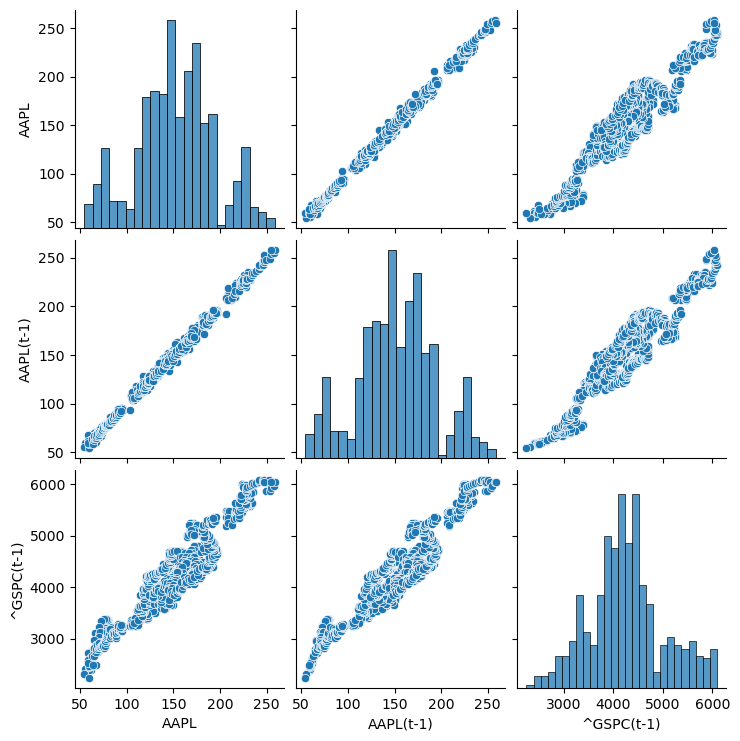

In [141]:
# Assumptions of Linear Regression:
 # 1) Linearity between dependent and independent variable - Met
import seaborn as sns
df = df[['AAPL', 'AAPL(t-1)', '^GSPC(t-1)']]
sns.pairplot(df)
 # AAPL & AAPL(t-1) has linear relationship
 # AAPL & S&P500 has linear relationship
 # AAPL & AAPL_MA_5 has linear relationship

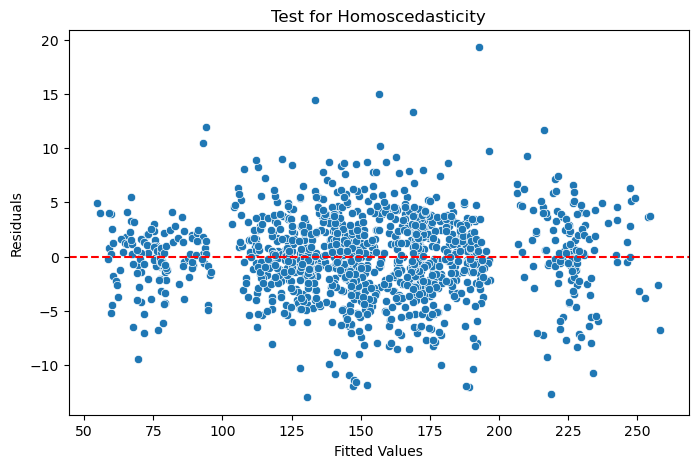

In [142]:
# 2) Homoscedasticity: Fitting Residual with the predicted value
residual = model.resid # Actual - Predicted
fitted = model.fittedvalues  # Predicted Y Value
plt.figure(figsize = (8,5))
sns.scatterplot(x = fitted, y = residual)
plt.axhline(0, color = 'red', linestyle = '--')
plt.title('Test for Homoscedasticity')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()
# Since it's a tube like structure => It is homoscedastic -> Assumption i
# If it was funnel like structure => It is heteroscedastic

In [143]:
X_const.columns

Index(['const', 'AAPL(t-1)', '^GSPC(t-1)'], dtype='object')

In [144]:
# 3) Multicollinearity => VIF (Variance Inflation Factor) => For independ
# Rule of thumb for VIF
# VIF < 1 => No Multicollinearity
# VIF < 10 => Moderate Multicollinearity
# VIF > 10 => Strong Multicollinearity
# VIF = Condition is Met
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_const.columns
vif['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range (X_const.shape[1])]
vif = vif[1:]
vif

,Features,VIF
1,AAPL(t-1),7.634912
2,^GSPC(t-1),7.634912


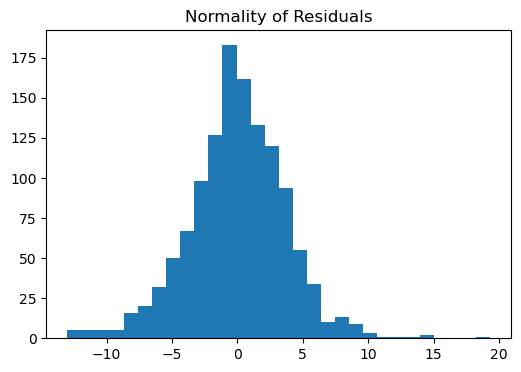

In [145]:
# 4) Assumption: Normality of Residual => 1) Visual Test (Histogram) or Q
plt.figure(figsize = (6,4))
plt.hist(residual, bins = 30)
plt.title("Normality of Residuals")
plt.show()

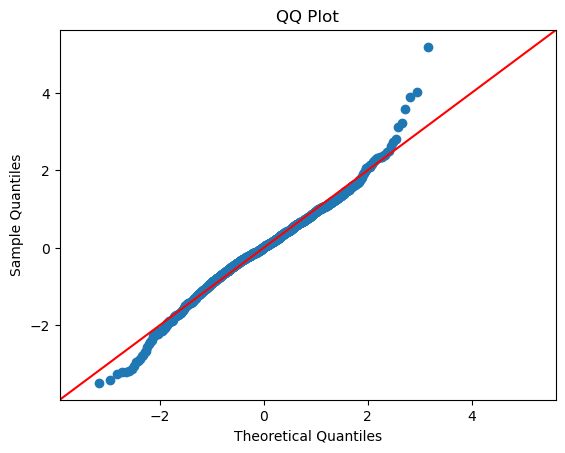

In [146]:
# QQ Plot for testing Normality of Residuals
import statsmodels.api as sm
sm.qqplot(residual, line = '45', fit = True)
plt.title('QQ Plot')
plt.show()

In [147]:
# Test 5: Auto correlation of Residual:  Durbin Watson Test
from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(residual)
dw # p value
 # p value < 0.05 => Autocorrelation b/w residual is there
 # p value > 0.05 => Autocorrelation b/w residual is not there
 # Our 5th condition is met

1.0410068667779497

In [148]:
 # All the 5 conditions of Linear Regression Modela are MET
 # Linearity
 # Homoscedasticity
 # VIF
 # Normality of Residuals
 # Auto correlation of Residual

In [149]:
 # Predict the Stock Price for the Year 2025

In [150]:
# Step 1: Download the data from Yahoo Finance
tickers = ['AAPL','^GSPC']

# Download last 5 years of daily data
df = yf.download(tickers, start="2025-01-01", end="2025-03-31")['Close']
df

[*********************100%***********************]  2 of 2 completed


Ticker,AAPL,^GSPC
Date,,
2025-01-02,243.263199,5868.549805
2025-01-03,242.774368,5942.470215
2025-01-06,244.410416,5975.379883
2025-01-07,241.627136,5909.029785
2025-01-08,242.115936,5918.250000
2025-01-10,236.280029,5827.040039
2025-01-13,233.835922,5836.220215
2025-01-14,232.718613,5842.910156
2025-01-15,237.297562,5949.910156


In [151]:
# Step 2: Data Eng
df['AAPL(t-1)'] = df['AAPL'].shift(1)
df['^GSPC(t-1)'] = df['^GSPC'].shift(1)
df = df.dropna()
df.head()

Ticker,AAPL,^GSPC,AAPL(t-1),^GSPC(t-1)
Date,,,,
2025-01-03,242.774368,5942.470215,243.263199,5868.549805
2025-01-06,244.410416,5975.379883,242.774368,5942.470215
2025-01-07,241.627136,5909.029785,244.410416,5975.379883
2025-01-08,242.115936,5918.250000,241.627136,5909.029785
2025-01-10,236.280029,5827.040039,242.115936,5918.250000


In [152]:
X_test = df[['AAPL(t-1)', '^GSPC(t-1)']]
X_test = sm.add_constant(X_test)
df_result = pd.DataFrame()
df_result['Actual'] = df['AAPL']
df_result['Predicted'] = model.predict(X_test)
df_result.head()

,Actual,Predicted
Date,,
2025-01-03,242.774368,243.390885
2025-01-06,244.410416,242.969536
2025-01-07,241.627136,244.605982
2025-01-08,242.115936,241.813660
2025-01-10,236.280029,242.302085


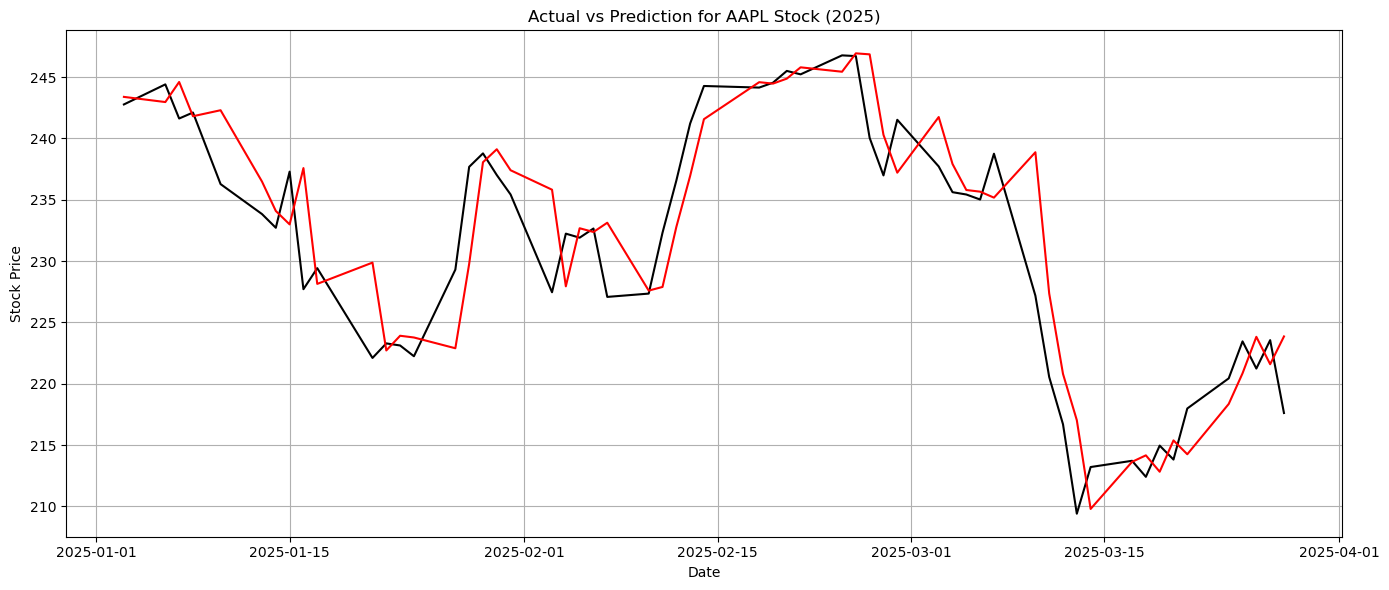

In [153]:
# Plot between Actual vs Predicted Value
import matplotlib.pyplot as plt
plt.figure(figsize = (14,6))
plt.plot(df_result.index, df_result['Actual'], label = 'Actual', color ='black') 
plt.plot(df_result.index, df_result['Predicted'], label = 'Predicted', color ='red')
plt.title("Actual vs Prediction for AAPL Stock (2025)")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.grid(True)
plt.tight_layout()
plt.show()

In [154]:
# Risk Metrics
# Calculate rmse and mse
# rmse = root mean square error => Sq root(Avg((A - P)^2))
# mse = mean square error => Avg((A - P)^2)
from sklearn.metrics import mean_squared_error
import numpy as np
# Calculate mse
mse = mean_squared_error(df_result['Actual'], df_result['Predicted'])
rmse = np.sqrt(mse)
print(rmse, mse)

4.1601492509628235 17.30684179028654


In [155]:
# Conclusion: It's a decent Model but not 100% Accurate
 # Lesson: Stock data in general have lot of non linearities
 # It's extremely tough to use simple linear regression model just to capture non linear effect
 # That's why in the industry it's common to use ML Models which are great in capturing non-Linearity

# RIDGE REGRESSION

In [156]:
#Step 1: Import all the required libraries
# Step 2: Define Features and Target Variables
# Step 3: Train Test Split
# Step 4: Apply Ridge Regression
# Step 5: Get Intercept and Coeff for Ridge Regression
# Step 6: Predict using Ridge Regression
# Step 7: Create a dataframe with Actual and Predicted Values
# Step 8: Plot Actual & Predicted Values
# Step 9: Evaluate the Model - R square, mse, rmse

In [157]:
# Step 1: Import all the required libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, mean_squared_error

In [158]:
# Step 1: Download the data from Yahoo Finance
tickers = ['AAPL', 'AMZN', 'MSFT', 'QQQ', '^GSPC']
df = yf.download(tickers, start = '2020-01-01', end = '2025-04-01')['Close']
df

[*********************100%***********************]  5 of 5 completed


Ticker,AAPL,AMZN,MSFT,QQQ,^GSPC
Date,,,,,
2020-01-02,72.620834,94.900497,153.042282,209.325897,3257.850098
2020-01-03,71.914825,93.748497,151.136658,207.408508,3234.850098
2020-01-06,72.487846,95.143997,151.527313,208.744858,3246.280029
2020-01-07,72.146919,95.343002,150.145706,208.715820,3237.179932
2020-01-08,73.307518,94.598503,152.537292,210.284592,3253.050049
...,...,...,...,...,...
2025-03-25,223.456970,205.710007,394.435883,493.459991,5776.649902
2025-03-26,221.239868,201.130005,389.255402,484.380005,5712.200195
2025-03-27,223.556839,201.360001,389.864258,481.619995,5693.310059


In [159]:
 # Step 2: Perform Feature Engineering
 # Lesson: To predict AAPL Stock price, we have to consider yesterday's p
 # The market is not open yet so we don't know what's the price today
 # Considering Yesterday's Value
df['AAPL(t-1)'] = df['AAPL'].shift(1)
df['AMZN(t-1)'] = df['AMZN'].shift(1)
df['MSFT(t-1)'] = df['MSFT'].shift(1)
df['QQQ(t-1)'] = df['QQQ'].shift(1)
df['^GSPC(t-1)'] = df['^GSPC'].shift(1)
# Moving Avg (MA): Technical Indicator - It helps you understand the sho
df['AAPL_MA_5'] = df['AAPL'].rolling(window=5).mean()
df['AMZN_MA_5'] = df['AMZN'].rolling(window=5).mean()
df['MSFT_MA_5'] = df['MSFT'].rolling(window=5).mean()
df['QQQ_MA_5'] = df['QQQ'].rolling(window=5).mean()
df['^GSPC_MA_5'] = df['^GSPC'].rolling(window=5).mean()
# Set Y Variable - Next day
df['Target'] = df['AAPL'].shift(-1)
df = df.dropna()
df

Ticker,AAPL,AMZN,MSFT,QQQ,^GSPC,AAPL(t-1),AMZN(t-1),MSFT(t-1),QQQ(t-1),^GSPC(t-1),AAPL_MA_5,AMZN_MA_5,MSFT_MA_5,QQQ_MA_5,^GSPC_MA_5,Target
Date,,,,,,,,,,,,,,,,
2020-01-08,73.307518,94.598503,152.537292,210.284592,3253.050049,72.146919,95.343002,150.145706,208.715820,3237.179932,72.495589,94.746899,151.677850,208.895935,3245.842041,74.864624
2020-01-09,74.864624,95.052498,154.442947,212.066376,3274.699951,73.307518,94.598503,152.537292,210.284592,3253.050049,72.944347,94.777299,151.957983,209.444031,3249.212012,75.033859
2020-01-10,75.033859,94.157997,153.728287,211.524124,3265.350098,74.864624,95.052498,154.442947,212.066376,3274.699951,73.568153,94.859200,152.476309,210.267154,3255.312012,76.636925
2020-01-13,76.636925,94.565002,155.576767,213.964462,3288.129883,75.033859,94.157997,153.728287,211.524124,3265.350098,74.397969,94.743401,153.286200,211.311075,3263.681982,75.602066
2020-01-14,75.602066,93.472000,154.481049,213.121948,3283.149902,76.636925,94.565002,155.576767,213.964462,3288.129883,75.088998,94.369200,154.153268,212.192300,3272.875977,75.278076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-24,220.440918,203.259995,392.359680,490.660004,5767.569824,217.984146,196.210007,390.543030,480.123993,5667.560059,215.922849,196.556000,387.792072,480.667542,5677.594043,223.456970
2025-03-25,223.456970,205.710007,394.435883,493.459991,5776.649902,220.440918,203.259995,392.359680,490.660004,5767.569824,218.131952,199.134000,390.115808,484.592859,5709.991992,221.239868
2025-03-26,221.239868,201.130005,389.255402,484.380005,5712.200195,223.456970,205.710007,394.435883,493.459991,5776.649902,219.388303,200.252002,390.545020,485.434070,5717.374023,223.556839


In [160]:
# Step 2: Define Features and Target Variables
X = df[['AAPL(t-1)', 'AMZN(t-1)',
 'MSFT(t-1)', 'QQQ(t-1)', '^GSPC(t-1)', 'AAPL_MA_5', 'AMZN_MA_5',
 'MSFT_MA_5', 'QQQ_MA_5', '^GSPC_MA_5']]
Y = df['Target']

In [161]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.08,shuffle=False)

In [162]:
# Step 4: Apply Ridge Regression
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 10)
ridge.fit(X_train, Y_train) # Train the model

Ridge(alpha=10)

In [163]:
# Step 5: Get Intercept and Coeff for Lasso Regression
coefficients = ridge.coef_
coefficients
intercept = ridge.intercept_
intercept
coeff_df = pd.DataFrame({'Feature':X.columns, 'Coefficients':coefficients})
coeff_df

,Feature,Coefficients
0,AAPL(t-1),0.429307
1,AMZN(t-1),0.054094
2,MSFT(t-1),-0.033529
3,QQQ(t-1),0.064898
4,^GSPC(t-1),0.004273
5,AAPL_MA_5,0.551371
6,AMZN_MA_5,-0.050849
7,MSFT_MA_5,0.049555
8,QQQ_MA_5,-0.066909
9,^GSPC_MA_5,-0.004916


In [164]:
# Step 6: Predict using Ridge Regression
y_pred = ridge.predict(X_test)
y_pred

array([230.59323758, 230.66731295, 230.95339063, 231.71153359,
       231.92957032, 229.68121828, 226.11721215, 224.3837042 ,
       222.52759682, 222.6305213 , 223.38892793, 225.9832105 ,
       225.59507005, 224.16694013, 224.10197993, 224.85177485,
       225.72027452, 223.87531582, 226.04520492, 227.2021958 ,
       227.56160116, 227.8239633 , 228.73095399, 230.95983114,
       232.85640484, 233.32706419, 235.75238312, 237.92171192,
       240.09950549, 241.5111302 , 241.66695473, 242.94656123,
       244.5932914 , 245.15878429, 246.00248881, 246.77982188,
       247.33333242, 249.7814235 , 250.92467929, 247.06214241,
       248.69541149, 252.04905115, 253.41548059, 256.28950263,
       256.88344559, 254.46951101, 251.98689365, 249.57904726,
       245.18842683, 244.62931315, 244.76539374, 241.62907737,
       241.14013676, 237.0264525 , 235.0244732 , 234.04352988,
       235.60360688, 230.02325944, 229.93836949, 225.98741212,
       224.8684327 , 224.07506138, 223.51639822, 227.36

In [165]:
# Step 7: Create a dataframe with Actual and Predicted Values
df_result = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred}) 
df_result

,Actual,Predicted
Date,,
2024-10-24,230.599411,230.593238
2024-10-25,232.582443,230.667313
2024-10-28,232.851501,230.953391
2024-10-29,229.294006,231.711534
2024-10-30,225.118683,231.929570
...,...,...
2025-03-24,223.456970,216.238128
2025-03-25,221.239868,219.504568
2025-03-26,223.556839,221.647372


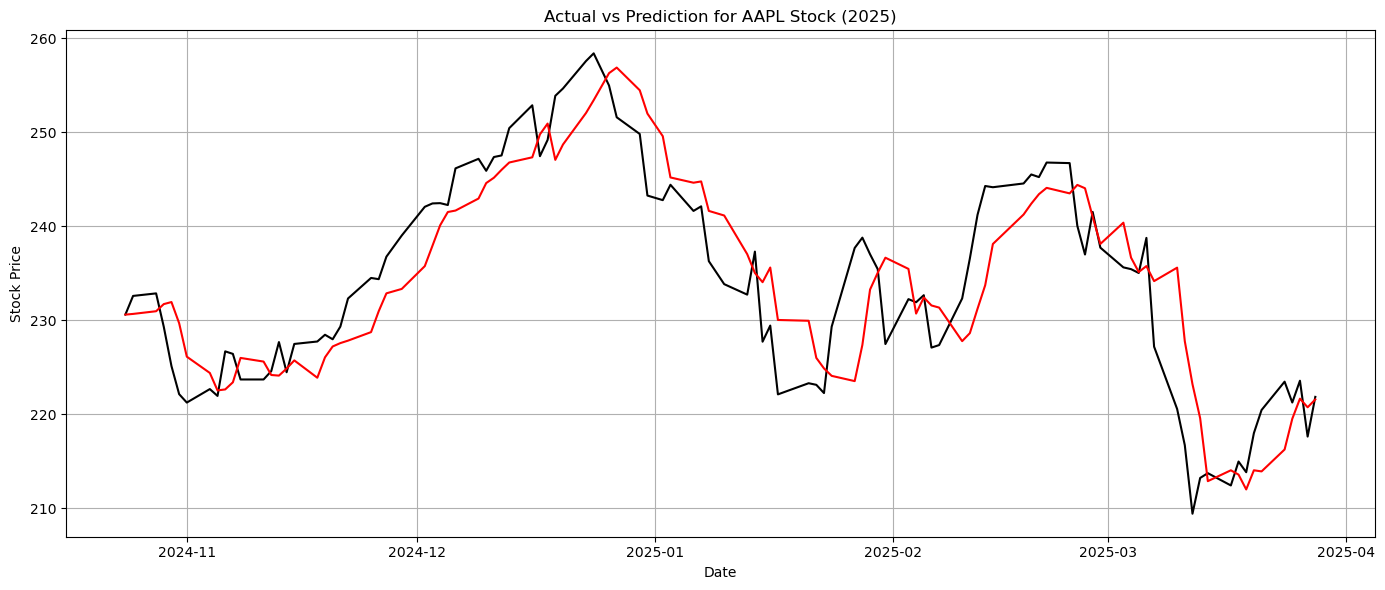

In [166]:
# Step 8: Plot Actual & Predicted Values
import matplotlib.pyplot as plt
plt.figure(figsize = (14,6))
plt.plot(df_result.index, df_result['Actual'], label = 'Actual', color ='black') 
plt.plot(df_result.index, df_result['Predicted'], label = 'Predicted', color ='red')
plt.title("Actual vs Prediction for AAPL Stock (2025)")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.grid(True)
plt.tight_layout()
plt.show()


In [167]:
# Step 9: Evaluate the Model - R square, mse, rmse
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(Y_test, y_pred)
print("R square", r2)
mse = mean_squared_error(Y_test, y_pred)
print("mse",mse)
rmse = np.sqrt(mse)
print("rmse", rmse)

R square 0.7841296015943354
mse 27.113725863685108
rmse 5.207084199788314


# LASSO REGRESSION

In [168]:
tickers = ['AAPL', 'AMZN', 'MSFT', 'QQQ', '^GSPC']
df = yf.download(tickers, start = '2020-01-01', end = '2025-04-01')['Close']
df    



[*********************100%***********************]  5 of 5 completed


Ticker,AAPL,AMZN,MSFT,QQQ,^GSPC
Date,,,,,
2020-01-02,72.620834,94.900497,153.042282,209.325897,3257.850098
2020-01-03,71.914825,93.748497,151.136658,207.408508,3234.850098
2020-01-06,72.487846,95.143997,151.527313,208.744858,3246.280029
2020-01-07,72.146919,95.343002,150.145706,208.715820,3237.179932
2020-01-08,73.307518,94.598503,152.537292,210.284592,3253.050049
...,...,...,...,...,...
2025-03-25,223.456970,205.710007,394.435883,493.459991,5776.649902
2025-03-26,221.239868,201.130005,389.255402,484.380005,5712.200195
2025-03-27,223.556839,201.360001,389.864258,481.619995,5693.310059


In [169]:
 # Step 2: Perform Feature Engineering
 # Lesson: To predict AAPL Stock price, we have to consider yesterday's p
 # The market is not open yet so we don't know what's the price today
 # Considering Yesterday's Value
df['AAPL(t-1)'] = df['AAPL'].shift(1)
df['AMZN(t-1)'] = df['AMZN'].shift(1)
df['MSFT(t-1)'] = df['MSFT'].shift(1)
df['QQQ(t-1)'] = df['QQQ'].shift(1)
df['^GSPC(t-1)'] = df['^GSPC'].shift(1)
# Moving Avg (MA): Technical Indicator
df['AAPL_MA_5'] = df['AAPL'].rolling(window=5).mean()
df['AMZN_MA_5'] = df['AMZN'].rolling(window=5).mean()
df['MSFT_MA_5'] = df['MSFT'].rolling(window=5).mean()
df['QQQ_MA_5'] = df['QQQ'].rolling(window=5).mean()
df['^GSPC_MA_5'] = df['^GSPC'].rolling(window=5).mean()
# Set Y Variable - Next day
df['Target'] = df['AAPL'].shift(-1)
df = df.dropna()
df

Ticker,AAPL,AMZN,MSFT,QQQ,^GSPC,AAPL(t-1),AMZN(t-1),MSFT(t-1),QQQ(t-1),^GSPC(t-1),AAPL_MA_5,AMZN_MA_5,MSFT_MA_5,QQQ_MA_5,^GSPC_MA_5,Target
Date,,,,,,,,,,,,,,,,
2020-01-08,73.307518,94.598503,152.537292,210.284592,3253.050049,72.146919,95.343002,150.145706,208.715820,3237.179932,72.495589,94.746899,151.677850,208.895935,3245.842041,74.864624
2020-01-09,74.864624,95.052498,154.442947,212.066376,3274.699951,73.307518,94.598503,152.537292,210.284592,3253.050049,72.944347,94.777299,151.957983,209.444031,3249.212012,75.033859
2020-01-10,75.033859,94.157997,153.728287,211.524124,3265.350098,74.864624,95.052498,154.442947,212.066376,3274.699951,73.568153,94.859200,152.476309,210.267154,3255.312012,76.636925
2020-01-13,76.636925,94.565002,155.576767,213.964462,3288.129883,75.033859,94.157997,153.728287,211.524124,3265.350098,74.397969,94.743401,153.286200,211.311075,3263.681982,75.602066
2020-01-14,75.602066,93.472000,154.481049,213.121948,3283.149902,76.636925,94.565002,155.576767,213.964462,3288.129883,75.088998,94.369200,154.153268,212.192300,3272.875977,75.278076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-24,220.440918,203.259995,392.359680,490.660004,5767.569824,217.984146,196.210007,390.543030,480.123993,5667.560059,215.922849,196.556000,387.792072,480.667542,5677.594043,223.456970
2025-03-25,223.456970,205.710007,394.435883,493.459991,5776.649902,220.440918,203.259995,392.359680,490.660004,5767.569824,218.131952,199.134000,390.115808,484.592859,5709.991992,221.239868
2025-03-26,221.239868,201.130005,389.255402,484.380005,5712.200195,223.456970,205.710007,394.435883,493.459991,5776.649902,219.388303,200.252002,390.545020,485.434070,5717.374023,223.556839


In [170]:
# STEPS FOR LASSO REGRESSION
# Step 1: Import all the required libraries
 # Step 2: Define Features and Target Variables
 # Step 3: Train Test Split
 # Step 4: Apply Lasso Regression
 # Step 5: Get Intercept and Coeff for Lasso Regression
 # Step 6: Predict using Lasso Regression
 # Step 7: Create a dataframe with Actual and Predicted Values
 # Step 8: Plot Actual & Predicted Values
 # Step 9: Evaluate the Model - R square, mse, rmse

In [171]:
# Step 1: Import all the required libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [172]:
X = df[['AAPL(t-1)', 'AMZN(t-1)',
 'MSFT(t-1)', 'QQQ(t-1)', '^GSPC(t-1)', 'AAPL_MA_5', 'AMZN_MA_5',
 'MSFT_MA_5', 'QQQ_MA_5', '^GSPC_MA_5']]
Y = df['Target']

In [173]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.05,shuffle=False)

In [174]:
# Step 4: Apply Lasso Regression
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 10)
lasso.fit(X_train, Y_train) # Train the model

Lasso(alpha=10)

In [175]:
# Step 5: Get Intercept and Coeff for Lasso Regression
coefficients = lasso.coef_
coefficients
intercept = lasso.intercept_
intercept
coeff_df = pd.DataFrame({'Feature':X.columns, 'Coefficients':coefficients})
coeff_df

,Feature,Coefficients
0,AAPL(t-1),0.572484
1,AMZN(t-1),-0.000000
2,MSFT(t-1),0.005909
3,QQQ(t-1),0.000000
4,^GSPC(t-1),0.002469
5,AAPL_MA_5,0.367735
6,AMZN_MA_5,-0.000000
7,MSFT_MA_5,0.000000
8,QQQ_MA_5,0.000000
9,^GSPC_MA_5,0.000000


In [176]:
# Step 6: Predict using Lasso Regression
y_pred = lasso.predict(X_test)
y_pred

array([249.13301694, 252.2825212 , 253.17307139, 255.8382041 ,
       256.71880689, 254.38245321, 251.89921047, 249.74768474,
       244.79706902, 243.95084451, 244.26224249, 241.9063471 ,
       241.70825436, 237.45164589, 235.20483793, 234.25434223,
       236.1431005 , 230.10949561, 230.40164523, 225.64309523,
       225.47600115, 225.05970812, 224.48958447, 229.40347173,
       235.55144507, 237.1029334 , 236.97977554, 235.86074465,
       230.75913388, 233.10470613, 232.65931484, 232.54296946,
       229.16452164, 229.43886632, 232.62282166, 235.62693429,
       239.72068203, 242.69784139, 243.5673301 , 244.52030569,
       245.31160753, 245.03066357, 246.00700748, 245.53631442,
       241.10339022, 238.80559199, 240.99084082, 237.68762946,
       235.97162515, 235.95071703, 235.23140375, 236.65190398,
       228.45524432, 223.17778199, 219.1707471 , 212.89961647,
       214.43550633, 214.21862993, 213.1620046 , 215.11965646,
       214.78257476, 217.69862665, 220.17514658, 222.39

In [177]:
df_result = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df_result

,Actual,Predicted
Date,,
2024-12-20,254.655716,249.133017
2024-12-23,257.578674,252.282521
2024-12-24,258.396667,253.173071
2024-12-26,254.974930,255.838204
2024-12-27,251.593079,256.718807
...,...,...
2025-03-24,223.456970,217.698627
2025-03-25,221.239868,220.175147
2025-03-26,223.556839,222.398481


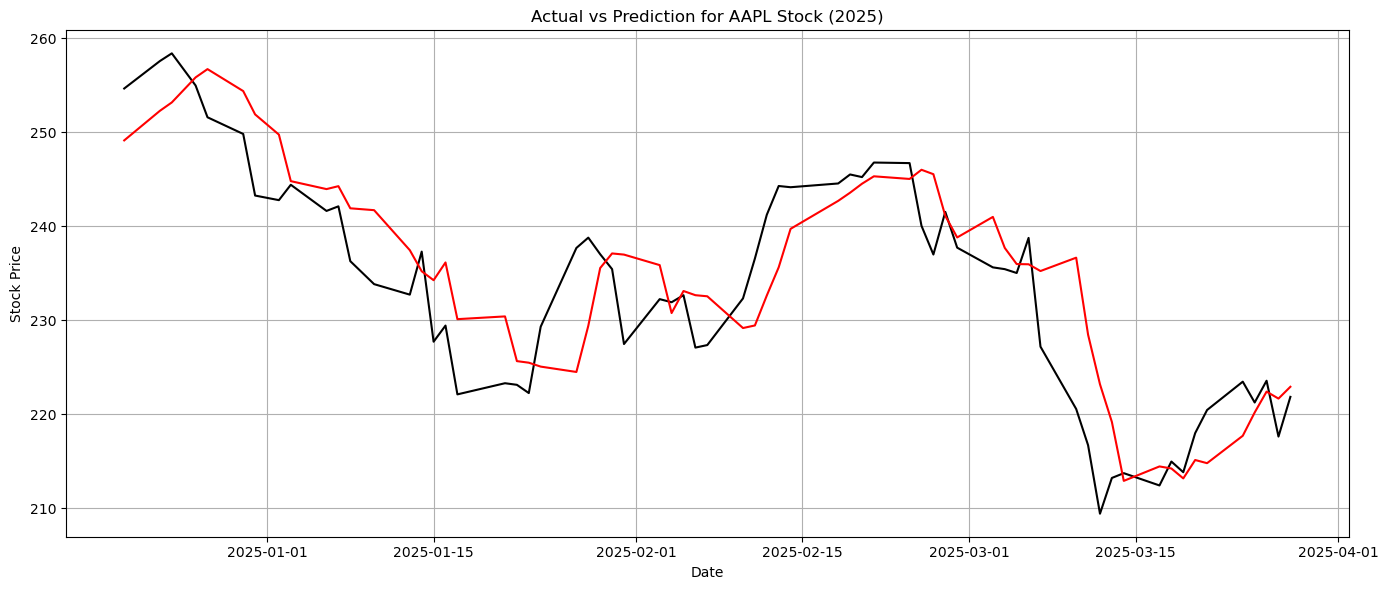

In [178]:
import matplotlib.pyplot as plt
plt.figure(figsize = (14,6))
plt.plot(df_result.index, df_result['Actual'], label = 'Actual', color ='black') 
plt.plot(df_result.index, df_result['Predicted'], label = 'Predicted', color ='red')
plt.title("Actual vs Prediction for AAPL Stock (2025)")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.grid(True)
plt.tight_layout()
plt.show()         


In [179]:
# Step 9: Evaluate the Model - R square, mse, rmse
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(Y_test, y_pred)
print("R square", r2)
# mean squared error mse
mse = mean_squared_error(Y_test, y_pred)
print("mse",mse)
#root mean squared error
rmse = np.sqrt(mse)
print("rmse", rmse)

R square 0.7598494310839414
mse 33.88100304623236
rmse 5.8207390463954285


# Elastic Net - Lasso + Ridge

In [180]:
# Step 1: Import all the required libraries
# Step 2: Define Features and Target Variables
# Step 3: Train Test Split
# Step 4: Apply Elastic Net Regression
# Step 5: Get Intercept and Coeff for Elastic Net Regression
# Step 6: Predict using Elastic Net Regression
# Step 7: Create a dataframe with Actual and Predicted Values
# Step 8: Plot Actual & Predicted Values
# Step 9: Evaluate the Model - R square, mse, rmse

In [181]:
# Step 1: Import all the required libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [182]:
X = df[['AAPL(t-1)', 'AMZN(t-1)',
 'MSFT(t-1)', 'QQQ(t-1)', '^GSPC(t-1)', 'AAPL_MA_5', 'AMZN_MA_5',
 'MSFT_MA_5', 'QQQ_MA_5', '^GSPC_MA_5']]
Y = df['Target']

In [183]:
# Step 4: Apply Elastic Net Regression
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha = 1, l1_ratio = 0.5)
elastic_net.fit(X_train, Y_train) #Train the model
# alpha = 1, alpha control the strength of regularization (higher alpha =
# l1_ratio = 0.5 => applying 50% lasso and 50% as ridge regression - alp

C:\Users\sharm\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.467e+03, tolerance: 2.125e+02
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=1)

In [184]:
# Step 5: Get Intercept and Coeff for Elastic Net Regression
coefficients = elastic_net.coef_
coefficients
intercept = elastic_net.intercept_
intercept
coeff_df = pd.DataFrame({'Feature':X.columns, 'Coefficients':coefficients})
coeff_df

,Feature,Coefficients
0,AAPL(t-1),0.529561
1,AMZN(t-1),0.000289
2,MSFT(t-1),0.010714
3,QQQ(t-1),0.002982
4,^GSPC(t-1),0.006588
5,AAPL_MA_5,0.447654
6,AMZN_MA_5,0.000000
7,MSFT_MA_5,0.000000
8,QQQ_MA_5,0.000000
9,^GSPC_MA_5,-0.006787


In [185]:
# Step 6: Predict using Elastic Net Regression
y_pred = elastic_net.predict(X_test)
y_pred

array([249.18533483, 252.61119778, 253.74456353, 256.54809016,
       257.32763709, 254.80098187, 252.19918168, 249.99407208,
       245.13360646, 244.48662671, 244.74148435, 242.0032893 ,
       241.77767566, 237.34542881, 235.22086171, 234.21227346,
       236.17615665, 230.14264062, 230.1773851 , 225.47646754,
       225.06156424, 224.48180133, 223.83248149, 228.20960585,
       234.62158574, 236.26915747, 236.52125784, 235.33760624,
       230.30991245, 232.51601497, 232.10522775, 231.95508695,
       228.42780332, 228.84863531, 231.90765557, 234.74381712,
       239.08247167, 242.10511835, 243.14344636, 244.21832741,
       245.06395105, 244.51031466, 245.53502148, 245.08617657,
       241.16712735, 238.55299714, 241.00878473, 237.42443109,
       235.57966156, 236.04812318, 235.06042124, 236.5949863 ,
       228.17181194, 223.0334433 , 219.21916732, 212.66189086,
       214.3025079 , 214.03416174, 212.60356173, 214.62058378,
       214.30902781, 217.07376356, 219.85557131, 222.05

In [186]:
# Step 7: Create a dataframe with Actual and Predicted Values
df_result = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df_result

,Actual,Predicted
Date,,
2024-12-20,254.655716,249.185335
2024-12-23,257.578674,252.611198
2024-12-24,258.396667,253.744564
2024-12-26,254.974930,256.548090
2024-12-27,251.593079,257.327637
...,...,...
2025-03-24,223.456970,217.073764
2025-03-25,221.239868,219.855571
2025-03-26,223.556839,222.056183


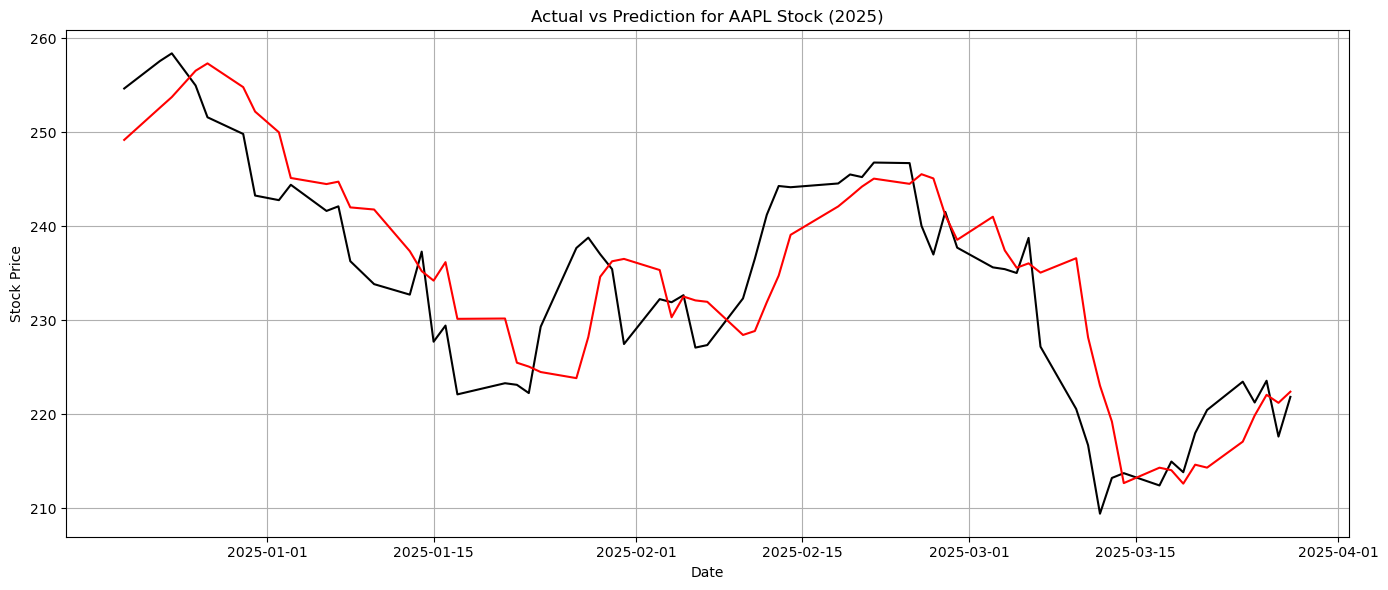

In [187]:
import matplotlib.pyplot as plt
plt.figure(figsize = (14,6))
plt.plot(df_result.index, df_result['Actual'], label = 'Actual', color ='black') 
plt.plot(df_result.index, df_result['Predicted'], label = 'Predicted', color ='red')
plt.title("Actual vs Prediction for AAPL Stock (2025)")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.grid(True)
plt.tight_layout()
plt.show()         

In [188]:
# Step 9: Evaluate the Model - R square, mse, rmse
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(Y_test, y_pred)
print("R square", r2)
# mean squared error mse
mse = mean_squared_error(Y_test, y_pred)
print("mse",mse)
#root mean squared error
rmse = np.sqrt(mse)
print("rmse", rmse)

R square 0.7513313465498123
mse 35.08275430316889
rmse 5.923069668944381
